In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [6]:
inperson=pd.read_csv('C:/Users/zhaleh/PhD_Projects/Divergent Paths of Beat Perception_3 Modalities/results/PreprocessedResults_MusicAdded.csv')
inperson.rename(columns={'Musician_years of instruction ( >= 5 -> 2 )':'Musicians','AudReg':'AudBeat','VisReg':'VisBeat','TactReg':'TactBeat'},inplace=True)
inperson = inperson.iloc[:141, :11]
inperson

,Name,Musicians,AudSD,AudIrreg,AudBeat,VisSD,VisIrreg,VisBeat,TactSD,TactIrreg,TactBeat
0,pilot 1,1.0,0.90,0.81,0.71,0.81,0.76,0.57,0.81,0.71,0.57
1,pilot 2,2.0,0.86,0.90,0.52,0.86,0.57,0.57,0.86,0.67,0.62
2,pilot 3,1.0,0.81,0.38,0.29,0.57,0.38,0.33,0.62,0.33,0.29
3,main 1,1.0,0.76,0.52,0.52,0.52,0.57,0.38,0.71,0.62,0.52
4,main 2,1.0,0.95,0.90,0.95,0.86,1.00,0.62,0.81,0.90,0.86
...,...,...,...,...,...,...,...,...,...,...,...
136,main 138,2.0,0.90,0.76,0.90,0.71,0.52,0.43,0.76,0.57,0.81
137,main 139,2.0,0.86,0.76,1.00,0.81,0.76,0.71,0.76,0.57,0.71
138,main 140,2.0,0.86,0.48,0.43,0.76,0.57,0.38,0.71,0.29,0.33
139,main 141,2.0,0.95,0.62,1.00,0.76,0.71,0.57,0.76,0.71,0.57


In [7]:
inperson1=inperson.melt('Musicians',['AudSD','AudIrreg','AudBeat','VisSD','VisIrreg','VisBeat','TactSD','TactIrreg','TactBeat'],var_name='Timing_levels',value_name='value')
inperson1['value'] = inperson1['value'].astype('float')
inperson1['Musicians'] = inperson1['Musicians'].astype('int')
inperson1

,Musicians,Timing_levels,value
0,1,AudSD,0.90
1,2,AudSD,0.86
2,1,AudSD,0.81
3,1,AudSD,0.76
4,1,AudSD,0.95
...,...,...,...
1264,2,TactBeat,0.81
1265,2,TactBeat,0.71
1266,2,TactBeat,0.33
1267,2,TactBeat,0.57


In [8]:
Modality=[]
for i in inperson1['Timing_levels']:
    if i[:3]=='Aud':
        Modality.append('Auditory')
    elif i[:3]=='Vis':
        Modality.append('Visual')
    else:
        Modality.append('Tactile')
# print(Modality)
Timing_levels=[]
for i in inperson1['Timing_levels']:
    if i[-2:] == 'SD':
        Timing_levels.append('SD')
    elif i[-2:]== 'eg':
        Timing_levels.append('Irreg')
    else:
        Timing_levels.append('Reg')
# print(Timing_levels)

In [9]:
inperson1.insert(loc=3,value=Modality,column='Modality')
inperson1.insert(loc=4,value=Timing_levels,column='Timing_level')
inperson1

,Musicians,Timing_levels,value,Modality,Timing_level
0,1,AudSD,0.90,Auditory,SD
1,2,AudSD,0.86,Auditory,SD
2,1,AudSD,0.81,Auditory,SD
3,1,AudSD,0.76,Auditory,SD
4,1,AudSD,0.95,Auditory,SD
...,...,...,...,...,...
1264,2,TactBeat,0.81,Tactile,Reg
1265,2,TactBeat,0.71,Tactile,Reg
1266,2,TactBeat,0.33,Tactile,Reg
1267,2,TactBeat,0.57,Tactile,Reg


In [10]:
inperson1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1269 entries, 0 to 1268
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Musicians      1269 non-null   int32  
 1   Timing_levels  1269 non-null   object 
 2   value          1269 non-null   float64
 3   Modality       1269 non-null   object 
 4   Timing_level   1269 non-null   object 
dtypes: float64(1), int32(1), object(3)
memory usage: 44.7+ KB


<Figure size 300x400 with 0 Axes>

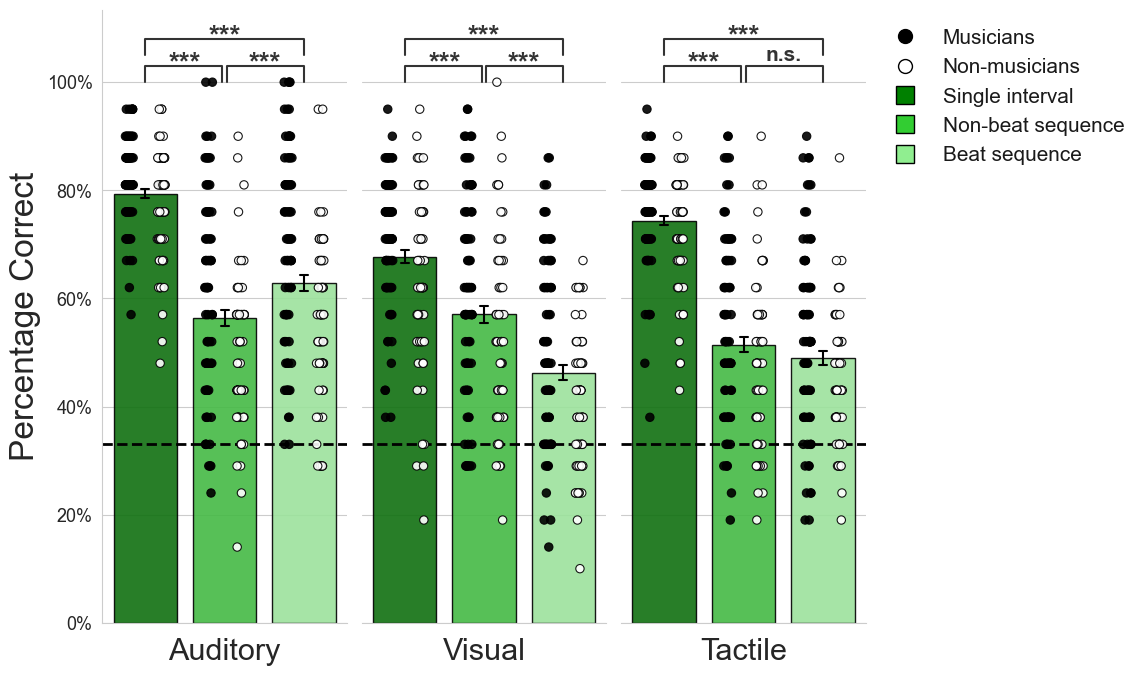

In [12]:
# 😍😍 this code is working!
sns.set_style('whitegrid')
plt.figure(figsize=(3,4))
############# plot #############
g=sns.catplot(data=inperson1, kind='bar', x='Timing_level', y='value',col='Modality',errorbar='se', 
              palette=['green','limegreen','lightgreen'],edgecolor="black",
               errcolor="black", errwidth=1.5, capsize = 0.1, height=7, aspect=0.4,alpha=0.9,
              legend=False, sharey=True, sharex=True, margin_titles=False) #ci = "sd"

g.map(sns.stripplot,'Timing_level','value',hue=inperson1['Musicians'],hue_order=[2,1],palette=['black','white'], dodge=True,
       alpha=0.9, edgecolor='k', linewidth=0.8, size=6)

############ Aestetics ###############
g.fig.tight_layout()
g.set_axis_labels("","Percentage Correct",size=24)
g.set_titles('')
g.axes[0,0].set_xlabel('Auditory',alpha=1,size=22)
g.axes[0,1].set_xlabel('Visual',alpha=1,size=22)
g.axes[0,2].set_xlabel('Tactile',alpha=1,size=22)
g.set_titles(row_template='{row_name}',col_template='{col_name}')

g.set_titles("")
# title='Discrimination performance as a function of \n modality and timing levels'
# g.fig.suptitle(title, fontsize=26, y=1.05)
sns.despine(ax=g.axes[0, 1], left=True)
sns.despine(ax=g.axes[0, 2], left=True)
g.set_xticklabels([]) # makes labels for each bar disappers
g.set_yticklabels(size=13)
g.axes[0,0].axhline(y=0.33, color='black', linestyle='--',lw=2)
g.axes[0,1].axhline(y=0.33, color='black', linestyle='--',lw=2)
g.axes[0,2].axhline(y=0.33, color='black', linestyle='--',lw=2)

############## legend ################
new_labels = ['Musicians', 'Non-musicians', 'Single interval', 'Non-beat sequence','Beat sequence']
handles_swarm, labels_swarm = g.axes[0, 0].get_legend_handles_labels()

# Create a legend with custom icon colors
legend_colors = ['black', 'white', 'green','limegreen','lightgreen']  # Replace with your desired colors

custom_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markeredgecolor='black', markersize=10) if idx < 2
    else plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markeredgecolor='black', markersize=13)
    for idx, color in enumerate(legend_colors)
]

dot_legend = plt.legend(custom_handles, new_labels, loc='upper left', bbox_to_anchor=(1, 1),
                        frameon=False, fontsize=15, labelcolor='0.1', title='')

# Optionally, set the legend text (labels) color
dot_legend.get_title().set_color('0.2')  

from matplotlib.ticker import PercentFormatter
g.axes[0,0].yaxis.set_major_formatter(PercentFormatter(1.0))

########### Statistical significance #################
max_val=max(inperson1['value'])
g.axes[0,0].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,0].plot([0,0,2,2],[max_val+0.05,max_val+0.08,max_val+0.08,max_val+0.05],lw=1.5,color='0.2',clip_on=False)
g.axes[0,0].text(x=0.5,y=max_val+0.02, s='***',ha='center',size=20,weight='bold',color='0.2')
g.axes[0,0].text(x=1,y=max_val+0.07, s='***',ha='center',size=20,weight='bold',color='0.2')
g.axes[0,0].plot([1.03,1.03,2,2],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,0].text(x=1.5,y=max_val+0.02, s='***',ha='center',size=20,weight='bold',color='0.2')

g.axes[0,1].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,1].plot([0,0,2,2],[max_val+0.05,max_val+0.08,max_val+0.08,max_val+0.05],lw=1.5,color='0.2',clip_on=False)
g.axes[0,1].text(x=0.5,y=max_val+0.02, s='***',ha='center',size=20,weight='bold',color='0.2')
g.axes[0,1].text(x=1,y=max_val+0.07, s='***',ha='center',size=20,weight='bold',color='0.2')
g.axes[0,1].plot([1.03,1.03,2,2],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,1].text(x=1.5,y=max_val+0.02, s='***',ha='center',size=20,weight='bold',color='0.2')

g.axes[0,2].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,2].plot([0,0,2,2],[max_val+0.05,max_val+0.08,max_val+0.08,max_val+0.05],lw=1.5,color='0.2',clip_on=False)
g.axes[0,2].text(x=0.5,y=max_val+0.02, s='***',ha='center',size=20,weight='bold',color='0.2')
g.axes[0,2].text(x=1,y=max_val+0.07, s='***',ha='center',size=20,weight='bold',color='0.2')
g.axes[0,2].plot([1.03,1.03,2,2],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,2].text(x=1.5,y=max_val+0.04, s='n.s.',ha='center',size=15,weight='bold',color='0.2')

###### tif format
# tif_path = 'C:/Users/zhaleh/PhD_Projects/Divergent Paths of Beat Perception_3 Modalities/plots/group analysis.tif'
# plt.savefig(tif_path, bbox_inches='tight', dpi=600)  # Use 600 DPI for line drawings

### png format
plt.savefig('C:/Users/zhaleh/PhD_Projects/Divergent Paths of Beat Perception_3 Modalities/plots/group analysis.png', bbox_inches='tight',dpi=400)

plt.show()